In [4]:
##
## Binary Search Tree
## 
class Node:
    def __init__(self, val):
        self.l_child = None
        self.r_child = None
        self.parent = None
        self.data = val


def insert(root, node):
    """inserts a node into a tree rooted at root, returns the root"""
    if root is None:
        root = node
    else:
        if root.data > node.data:
            if root.l_child is None:
                root.l_child = node
                node.parent = root
            else:
                insert(root.l_child, node)
        else:
            if root.r_child is None:
                root.r_child = node
                node.parent = root
            else:
                insert(root.r_child,node)
    return root

def search(root, value):
    """searches a tree rooted at root for a node with data = value, returns the node if found, None otherwise"""
    
    #Compare
    if value == root.data:
        return root
    
    #If not current node not leaf, and value is greater
    elif value > root.data and root.r_child != None:
        #Search left child
        search(root.r_child, value)
        
    #If not current node not leaf, and value is smaller
    elif value < root.data and root.l_child != None:
        #Search right child
        search(root.l_child, value)
    
    #If not in tree 
    else:
        return None
    
def search_data(root, value): 
    node = search(root, value)
    if node:
        return node.data
    else: 
        return node


def delete(root, value):
    """if a node with data = value is present in the tree rooted at root, deletes that node and returns the root"""
    #finds the node and its parent, continues if it is present
    #From Emma's Pre-class work covered in class.
    node = search(root, value)
    
    if node is not None: 
        parent = node.parent
        
        #handles case where node has no children, just removes it
        if node.l_child is None and node.r_child is None:
            if parent.l_child == node:
                parent.l_child = None
                remove_node(node)
            elif parent.r_child == node:
                parent.r_child = None
                remove_node(node)
       
       #handles case where node only has left child, replaces self with child 
        elif node.l_child and node.r_child is None:
            if parent.l_child == node:
                parent.l_child = node.l_child
                remove_node(node)
            elif parent.r_child == node:
                parent.r_child = node.l_child
                remove_node(node)
                
        #handles case where node only has right child, replaces self with child 
        elif node.r_child and node.l_child is None:
            if parent.l_child == node:
                parent.l_child = node.r_child
                remove_node(node)
            elif parent.r_child == node:
                parent.r_child = node.r_child
                remove_node(node)
                #handles case where node has two children, replaces with minimum node larger than it        
       
        elif node.r_child and node.l_child:
            new = find_min(node.r_child)
            node.data = new.data
            remove_node(new)
            
    return root
    
def inorder(root, sorted_tree=[]): 
    """returns a list of all data in the tree rooted at root produced using an in order traversal. Adaped from CLRS, p.288"""
    if root:
        
        #Call on all smaller elements
        inorder(root.l_child, sorted_tree)
        
        #Append itself
        sorted_tree.append(root.data)
        
        #Call on all larger elements
        inorder(root.r_child, sorted_tree)
    
    return sorted_tree 

        
    
    
def to_string(root): 
    """returns a string with the relevant binary tree structure associated with the BST with the given root """
    if not root: 
        return 'Nil'
    else: 
        r = to_string(root.r_child) if root.r_child else 'Nil'
        l = to_string(root.l_child) if root.l_child else 'Nil'
        return 'Node(' + str(root.data) + ' L: ' + l + ' R: ' + r + ')'
###
### Simple List Code
###

def list_insert(lst, value): 
    """inserts value into lst in sorted order"""
    #Assuming list is sorted
    for i in range(lst):
        if value < lst[i]:
            lst.insert(i, value)
            
            
def list_delete(lst, value): 
    """ deletes first instance of value from lst if it present"""
    if value in lst:
        lst.remove(value)
    
def list_search(lst, value): 
    """ searches lst for value and returns value if present, None if it is not present"""
    if value in lst:
        return value
    else:
        return None

In [5]:
import random

bst = None
nodes = [4,5,6,1,2,3]
for x in nodes:
    bst = insert(bst,Node(x))
print(to_string(bst))

for x in [Node(random.randint(0,100)) for _ in range(50)]: 
    if not bst: 
        bst = x
    else: 
        insert(bst, x)
    
for x in [random.randint(0,100) for _ in range(50)]: 
    bst = delete(bst, x)

for x in [random.randint(0,100) for _ in range(50)]: 
    print(x, search_data(bst, x))

Node(4 L: Node(1 L: Nil R: Node(2 L: Nil R: Node(3 L: Nil R: Nil))) R: Node(5 L: Nil R: Node(6 L: Nil R: Nil)))
69 None
78 None
30 None
9 None
35 None
29 None
26 None
15 None
35 None
98 None
69 None
99 None
24 None
63 None
89 None
74 None
5 None
58 None
1 None
87 None
94 None
91 None
49 None
78 None
10 None
40 None
99 None
12 None
32 None
16 None
23 None
50 None
93 None
100 None
60 None
62 None
42 None
47 None
79 None
43 None
23 None
76 None
85 None
62 None
48 None
82 None
34 None
41 None
80 None
88 None


In [6]:
bst = None
nodes = [4,5,6,1,2,3]
for x in nodes:
    bst = insert(bst,Node(x))
print(to_string(bst))
avg_comparisons(bst)

Node(4 L: Node(1 L: Nil R: Node(2 L: Nil R: Node(3 L: Nil R: Nil))) R: Node(5 L: Nil R: Node(6 L: Nil R: Nil)))


TypeError: 'NoneType' object is not subscriptable

In [7]:
def search(root, value, counter = 0):
    """searches a tree rooted at root for a node with data = value, returns the node if found, None otherwise"""
    if root is None or value == root.data:
        counter += 1
        return root, counter
    if value < root.data:
        counter += 1
        return search(root.l_child, value, counter)
    else:
        counter += 1
        return search(root.r_child, value, counter)

def search_data(root, value): 
    node, counter = search(root, value)
    if node: 
        return node, counter
    else: 
        return node, 0

def inorder(root, sorted_tree=[]): 
    """returns a list of all data in the tree rooted at root produced using an in order traversal. Adaped from CLRS, p.288"""
    if root:
        
        #Call on all smaller elements
        inorder(root.l_child, sorted_tree)
        
        #Append itself
        sorted_tree.append(root.data)
        
        #Call on all larger elements
        inorder(root.r_child, sorted_tree)
    
    return sorted_tree    
    
#Trying to get this to work 
def total_comparisons(bst):
    nodes = inorder(bst)
    
    comp = 0
    if not nodes:
        return comp
    
    for node in nodes:
        #michael all you :P
        comp = search_data(bst, node)[1]
        
    return comp
    

def bst_size(bst):
    
    #Termination condition
    if bst is None:
        return 0
    
    #Size from some root, is equal to left + right subtree + itself
    else:
        size = bst_size(bst.l_child) + 1 + bst_size(bst.r_child)
    
    return size



def avg_comparisons(bst):
    return total_comparisons(bst)/bst_size(bst)


def max_height(bst):
    #Counter
    height = 0
    
    #Termination condition
    if bst is None:
        return height
    
    else:
        #Recursively call left  and right subtrees to determine which is higher
        #Pick the max and return it +1.
        height += 1 + max(max_height(bst.l_child), max_height(bst.l_child))
    
    return height


def avg_height(bst):
    return avg_comparisons(bst)-1




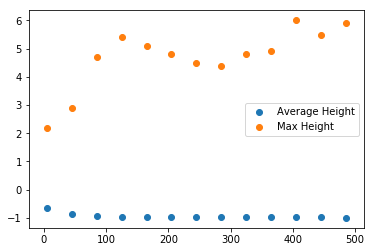

In [9]:
import matplotlib.pyplot as plt
import random

average_height = []
maximum_height = []
range_list = [x for x in range(5, 500, 40)]

#To reduce variability
i = 10

for n in range_list:
    avg_temp = 0
    max_temp = 0
    for _ in range(i):
        random_list = [random.randint(1, 101) for _ in range(n)]
        bst = None
        for x in random_list:
            bst = insert(bst,Node(x))
        
        #Increment temps
        avg_temp += avg_height(bst)
        max_temp += max_height(bst)
        
    average_height.append(avg_temp/i)
    maximum_height.append(max_temp/i)

plt.scatter(range_list, average_height, label = "Average Height")
plt.scatter(range_list, maximum_height, label = "Max Height")
plt.legend(loc=0)
plt.show()

In [52]:
def avg_comparisions(bst):
    #counter
    comparisons = 0 
    
    
    #For every node
    for node in bst[1:]:
        
        #While not itself
        while node is not root.data:
            
            #increment 
            comparisons += 1
            
            #Decide which side to keep exploring
            if node > root.data:
                root = root.r_child
            else:
                root = root.l_child
        
        #comparisons += 1
    
    #Return average
    return (comparisons / len(bst))

In [65]:
def inorder(root): 
    lst=[]
    if root:
        inorder(root.l_child)
        lst.append(root.data)
        inorder(root.r_child)
    return lst

In [6]:
ord("z")

122